In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
%matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')

In [3]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [4]:
print(data.describe())
print(data.shape)

                age
count  37250.000000
mean      40.697369
std       10.220043
min       17.000000
25%       33.000000
50%       40.000000
75%       48.000000
max       86.000000
(37250, 4)


In [5]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [6]:
import datetime
def convert(s):
    h,m,s=map(int,s.split(':'))
    return datetime.timedelta(hours=h,minutes=m,seconds=s)

data=pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv',converters={'split':convert,'final':convert})


In [7]:
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [8]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


MemoryError: Unable to allocate 102. TiB for an array with shape (14068000000002,) and data type float64

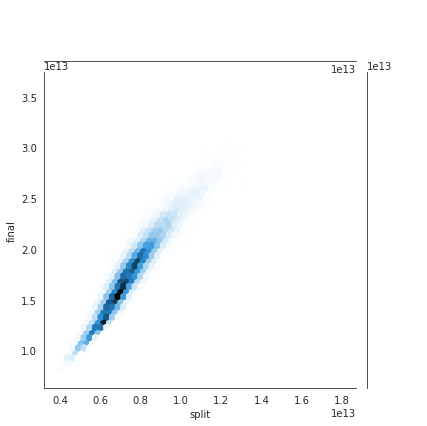

In [9]:
with sns.axes_style('white'):
    g=sns.jointplot("split","final",data,kind='hex')
    g.ax_join.plot(np.linspace(4000,16000),np.linspace(8000,32000),':k')

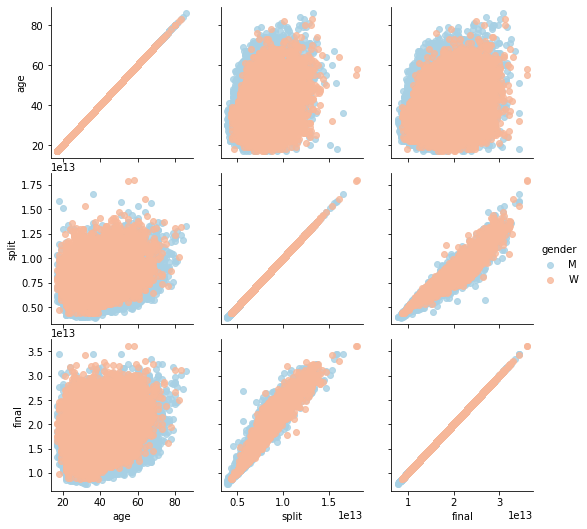

In [10]:
g=sns.PairGrid(data,vars=['age','split','final'],hue='gender',palette='RdBu_r')
g.map(plt.scatter,alpha=0.8)
g.add_legend()

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

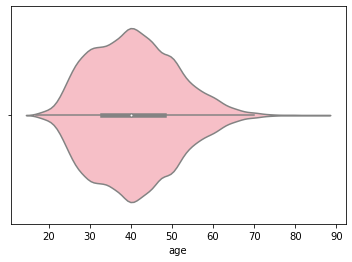

In [15]:
sns.violinplot("age",data=data,palette=["lightpink"])

<AxesSubplot:xlabel='age', ylabel='Density'>

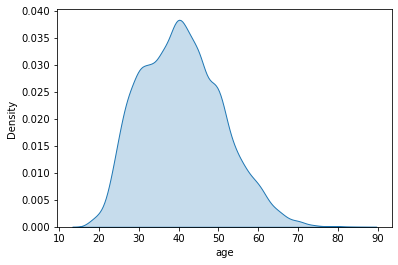

In [16]:
sns.kdeplot(data.age,shade=True)